# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import stats
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [4]:
# visual quick check
clean_hospital_read_df.info()
clean_hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


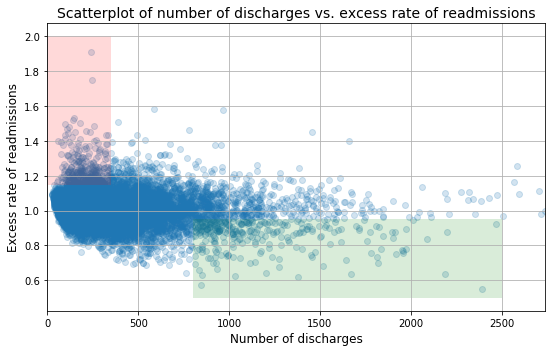

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Quick Plot
my_hospital_df = clean_hospital_read_df[clean_hospital_read_df["Number of Discharges"] != 0]
small_hospitals = my_hospital_df[my_hospital_df["Number of Discharges"] < 100]
large_hospitals = my_hospital_df[my_hospital_df["Number of Discharges"] > 1000]

trace0 = go.Box(name="Small Hospital ERR", x=small_hospitals["Excess Readmission Ratio"], boxmean="sd")
trace1 = go.Box(name="Large Hospital ERR", x=large_hospitals["Excess Readmission Ratio"], boxmean="sd")
trace2 = go.Histogram(name="Small Hospital ERR", x=small_hospitals["Excess Readmission Ratio"], histnorm="probability", marker=dict(color="rgb(31,119,180)"))
trace3 = go.Histogram(name="Large Hospital ERR", x=large_hospitals["Excess Readmission Ratio"], histnorm="probability", marker=dict(color="rgb(255,127,14)"))

fig = py.tools.make_subplots(rows=2, cols=1, shared_xaxes=True)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 1)

fig["layout"].update(
    plot_bgcolor="rgb(247,247,247)",
    legend=dict(font=dict(family="serif", size=12)),
    height=600,
    title="<b>Excess Readmission Rate Distributions for Small & Large Hospitals</b>",
    titlefont=dict(family="serif", size=24),
    yaxis1=dict(titlefont=dict(family="serif", size=14), domain=[0.8, 1], showticklabels=False), 
    yaxis2=dict(title="<b>PDF</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14), range=[0, 0.085], domain=[0, 0.8]), 
    xaxis1=dict(title="<b>Excess Readmission Ratio</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14)))

py.offline.iplot(fig)

# Quick Stats
n_small_hospitals = len(small_hospitals)
n_large_hospitals = len(large_hospitals)
small_ERR_mean = np.mean(small_hospitals["Excess Readmission Ratio"])
large_ERR_mean = np.mean(large_hospitals["Excess Readmission Ratio"])
small_ERR_stdv = np.std(small_hospitals["Excess Readmission Ratio"])
large_ERR_stdv = np.std(large_hospitals["Excess Readmission Ratio"])
small_ERR_conf_int = np.percentile(small_hospitals["Excess Readmission Ratio"], [2.5, 97.5])
large_ERR_conf_int = np.percentile(large_hospitals["Excess Readmission Ratio"], [2.5, 97.5])
small_ERR_moe = (small_ERR_conf_int[1] - small_ERR_conf_int[0]) / 2
large_ERR_moe = (large_ERR_conf_int[1] - large_ERR_conf_int[0]) / 2

print("Small Hospital Sample Size (n1): " + str(n_small_hospitals))
print("Small Hospital Sample Mean ERR (x1): " + str(round(small_ERR_mean, 3)))
print("Small Hospital Sample StDev ERR (s1): " + str(round(small_ERR_stdv, 3)))
print("Small Hospital Sample 95% Confidence Interval: " + str(round(small_ERR_conf_int[0], 3)) + " to " + str(round(small_ERR_conf_int[1], 3)))
print("Small Hospital Sample Margin of Error: " + str(round(small_ERR_moe, 3)))
print()
print("Large Hospital Sample Size (n2): " + str(n_large_hospitals))
print("Large Hospital Sample Mean ERR (x2): " + str(round(large_ERR_mean, 3)))
print("Large Hospital Sample StDev ERR (s2): " + str(round(large_ERR_stdv, 3)))
print("Large Hospital Sample 95% Confidence Interval: " + str(round(large_ERR_conf_int[0], 3)) + " to " + str(round(large_ERR_conf_int[1], 3)))
print("Large Hospital Sample Margin of Error: " + str(round(large_ERR_moe, 3)))

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



Small Hospital Sample Size (n1): 1188
Small Hospital Sample Mean ERR (x1): 1.023
Small Hospital Sample StDev ERR (s1): 0.058
Small Hospital Sample 95% Confidence Interval: 0.935 to 1.128
Small Hospital Sample Margin of Error: 0.097

Large Hospital Sample Size (n2): 463
Large Hospital Sample Mean ERR (x2): 0.978
Large Hospital Sample StDev ERR (s2): 0.12
Large Hospital Sample 95% Confidence Interval: 0.72 to 1.188
Large Hospital Sample Margin of Error: 0.234


I disagree with the original analysis because the graph and stats that I generated above point to a possibility that these differences in mean Excess Readmission Ratios (ERR) between small (*number of discharges < 100*) and large hospitals (*number of discharges > 1000*) could be occuring purely by chance. It appears that the original analysis did not take into consideration the variance of the two sample sets (*small and large hospitals' ERR*) and simply made administrative level recommendations based only on their mean values, not a confidence interval surrounding their mean values.

The graph in the original analysis looks sufficient for the analysis being conducted. The only thing thats confusing to me is the number of hospitals considered because the markers overlap in a certain quadrant (hot-spot) which is the desired effect in marker opacity minipulation. This could be corrected by simply stating the number of samples directly on the graph (N = 11,497 in the top right corner).

We can setup a few different hypothesis tests. The first test will be to determine whether or not the difference in the sample mean ERRs between small and large hospitals is significant or purely by chance:  
**Null Hypothesis:** $\mu$<sub>1</sub> = $\mu$<sub>2</sub>  
**Alternative Hypothesis:** $\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub>  
**Confidence Interval:** 95%  
**Signifigence Level:** $\alpha$ = 1%  

The second test will be to determine the proportion of small hospitals with ERRs greater than 1:  
**Null Hypothesis:** p<sub>small</sub> = 63%  
**Alternative Hypothesis:** p<sub>small</sub> $\neq$ 63%  
**Confidence Interval:** 95%  
**Signifigence Level:** $\alpha$ = 1%  

The third test will be to determine the proportion of large hospitals with ERRs greater than 1:  
**Null Hypothesis:** p<sub>large</sub> = 44%  
**Alternative Hypothesis:** p<sub>large</sub> $\neq$ 44%  
**Confidence Interval:** 95%  
**Signifigence Level:** $\alpha$ = 1%

In [7]:
# Bootstrap Replication Statistical Analysis
def draw_bs_reps(data, func, size=1):
    """Computes the bootstrap replicate(s) of a 1-dimensional numerical array"""
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample)
        
    return bs_replicates

bs_small_ERR_means = draw_bs_reps(small_hospitals["Excess Readmission Ratio"], np.mean, 1000)
bs_large_ERR_means = draw_bs_reps(large_hospitals["Excess Readmission Ratio"], np.mean, 1000)
bs_diffr_ERR_means = bs_small_ERR_means - bs_large_ERR_means

# Bootstrap Replication Plot 1
trace0 = go.Box(name="BS Small Mean ERR", x=bs_small_ERR_means, boxmean="sd")
trace1 = go.Box(name="BS Large Mean ERR", x=bs_large_ERR_means, boxmean="sd")
trace2 = go.Histogram(name="BS Small Mean ERR", x=bs_small_ERR_means, histnorm="probability", marker=dict(color="rgb(31,119,180)"))
trace3 = go.Histogram(name="BS Large Mean ERR", x=bs_large_ERR_means, histnorm="probability", marker=dict(color="rgb(255,127,14)"))

fig = py.tools.make_subplots(rows=2, cols=1, shared_xaxes=True)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 1)

fig["layout"].update(
    plot_bgcolor="rgb(247,247,247)",
    legend=dict(font=dict(family="serif", size=12)),
    height=600,
    title="<b>Bootstrap Replication of Mean Excess Readmission Rate for Small & Large Hospitals</b>",
    titlefont=dict(family="serif", size=24),
    yaxis1=dict(titlefont=dict(family="serif", size=14), domain=[0.8, 1], showticklabels=False), 
    yaxis2=dict(title="<b>PDF</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14), domain=[0, 0.8]), 
    xaxis1=dict(title="<b>Mean Excess Readmission Ratio</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14)))

py.offline.iplot(fig)

# Bootstrap Replication Plot 2
trace0 = go.Box(name="BS Mean {0} ERR".format("\u0394"), x=bs_diffr_ERR_means, boxmean="sd", marker=dict(color="green"))
trace1 = go.Histogram(name="BS Mean {0} ERR".format("\u0394"), x=bs_diffr_ERR_means, histnorm="probability", marker=dict(color="green"))
trace2 = go.Scatter(name="Null Hypothesis", x=[0, 0], y=[-0.005, 0.085], mode="lines", line=dict(color="red"))

fig = py.tools.make_subplots(rows=2, cols=1, shared_xaxes=True)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 2, 1)

fig["layout"].update(
    plot_bgcolor="rgb(247,247,247)",
    legend=dict(font=dict(family="serif", size=12)),
    height=600,
    title="<b>Bootstrap Replication of the Difference in Mean ERR between Small & Large Hospitals</b>",
    titlefont=dict(family="serif", size=24),
    yaxis1=dict(titlefont=dict(family="serif", size=14), domain=[0.8, 1], showticklabels=False), 
    yaxis2=dict(title="<b>PDF</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14), range=[0, 0.085], domain=[0, 0.8]), 
    xaxis1=dict(title="<b>Mean Difference in Excess Readmission Ratios</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14), 
                range=[-0.005, 0.065]))

py.offline.iplot(fig)

# Bootstrap Replication Results
print("Bootstrap Replication Statistics for {0}1={0}2:".format("\u03BC"))

bs_conf_int = np.percentile(bs_diffr_ERR_means, [2.5, 97.5])
print("     The margin of error is {0}".format(u"\u00B1") + str(round((bs_conf_int[1] - bs_conf_int[0]) / 2, 3)))
print("     The 95% confidence interval is " + str(round(bs_conf_int[0], 3)) + " to " + str(round(bs_conf_int[1], 3)))

d0 = 0
bs_p = np.sum(bs_diffr_ERR_means <= d0) / len(bs_diffr_ERR_means) * 2 # two-tail p-value
print("     The p-value is " + str(round(bs_p * 100, 2)) + "%")

# Frequentist Statistical Analysis
print()
print("Frequentist Statistics for {0}1={0}2 using the z-statistic:".format("\u03BC"))

# The margin of error for a 95% confidence interval
z_star = stats.norm.ppf(0.975) # two-tail 95% interval has 2.5% on both sides
diff_stdv = (np.var(small_hospitals["Excess Readmission Ratio"]) / n_small_hospitals + 
             np.var(large_hospitals["Excess Readmission Ratio"]) / n_large_hospitals) ** 0.5
moe = z_star * diff_stdv

print("     The margin of error is {0}".format(u"\u00B1") + str(round(moe, 3)))

# The 95% confidence interval
sample_mean_diff = small_ERR_mean - large_ERR_mean
conf_int = np.array([sample_mean_diff - moe, sample_mean_diff + moe])

print("     The 95% confidence interval is " + str(round(conf_int[0], 3)) + " to " + str(round(conf_int[1], 3)))

# The p-value
z = (sample_mean_diff - d0) / diff_stdv
z_p = stats.norm.sf(abs(z)) * 2 # two-tail p-value

print("     The p-value is " + str(round(z_p * 100, 2)) + "%")

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



Bootstrap Replication Statistics for μ1=μ2:
     The margin of error is ±0.012
     The 95% confidence interval is 0.032 to 0.056
     The p-value is 0.0%

Frequentist Statistics for μ1=μ2 using the z-statistic:
     The margin of error is ±0.011
     The 95% confidence interval is 0.033 to 0.056
     The p-value is 0.0%


The above hypothesis test(s) suggests that the mean ERR for small hospitals is in fact different than the mean ERR for large hospitals. Their difference is unlikely to be by chance.

In [8]:
trace0 = go.Box(name="Small Hospital ERR", x=small_hospitals["Excess Readmission Ratio"], boxmean="sd")
trace1 = go.Histogram(name="Small Hospital ERR", x=small_hospitals["Excess Readmission Ratio"], histnorm="probability", marker=dict(color="rgb(31,119,180)"))

fig = py.tools.make_subplots(rows=2, cols=1, shared_xaxes=True)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig["layout"].update(
    plot_bgcolor="rgb(247,247,247)",
    legend=dict(font=dict(family="serif", size=12)),
    height=600,
    title="<b>Excess Readmission Rate Distributions for Small Hospitals</b>",
    titlefont=dict(family="serif", size=24),
    yaxis1=dict(titlefont=dict(family="serif", size=14), domain=[0.8, 1], showticklabels=False), 
    yaxis2=dict(title="<b>PDF</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14), range=[0, 0.085], domain=[0, 0.8]), 
    xaxis1=dict(title="<b>Excess Readmission Ratio</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14)))

py.offline.iplot(fig)

z = (1 - small_ERR_mean) / small_ERR_stdv
z_p = stats.norm.sf(z)
print(str(round(z_p * 100, 1)) + "% of the small hospital population is greater than 1")

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



65.2% of the small hospital population is greater than 1


In [9]:
trace0 = go.Box(name="Large Hospital ERR", x=large_hospitals["Excess Readmission Ratio"], boxmean="sd", marker=dict(color="rgb(255,127,14)"))
trace1 = go.Histogram(name="Large Hospital ERR", x=large_hospitals["Excess Readmission Ratio"], histnorm="probability", marker=dict(color="rgb(255,127,14)"))

fig = py.tools.make_subplots(rows=2, cols=1, shared_xaxes=True)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig["layout"].update(
    plot_bgcolor="rgb(247,247,247)",
    legend=dict(font=dict(family="serif", size=12)),
    height=600,
    title="<b>Excess Readmission Rate Distributions for Large Hospitals</b>",
    titlefont=dict(family="serif", size=24),
    yaxis1=dict(titlefont=dict(family="serif", size=14), domain=[0.8, 1], showticklabels=False), 
    yaxis2=dict(title="<b>PDF</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14), range=[0, 0.085], domain=[0, 0.8]), 
    xaxis1=dict(title="<b>Excess Readmission Ratio</b>", titlefont=dict(family="serif", size=14), tickfont=dict(family="serif", size=14)))

py.offline.iplot(fig)

z = (1 - large_ERR_mean) / large_ERR_stdv
z_p = stats.norm.sf(z)
print(str(round(z_p * 100, 1)) + "% of the large hospital population is greater than 1")

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



42.8% of the large hospital population is greater than 1
